# Regularization

## Prerequisites
- [Bias, variance and generalisation](https://github.com/AI-Core/Strong-ML-Foundations/blob/master/Bias%2C%20variance%20and%20generalisation.ipynb)

Regularization is the name given to techniques that bias our search towards a subset of all possible parameters in order to reduce overfitting.

In this simple case, we bias the parameter values towards 0. This pushes the coeffecients of a feature to 0 if the feature is not contributing significantly to reducing the cost. For example, in the case that we are modelling a polynomial of order 2 using a polynomial of order 5, the coefficients of features which are of higher order than 2 should be pushed to 0.

To implement the above method, we simply add an extra term to our normal cost function which is equal to the sum of the square of all weights multiplied by a "regularization factor" which controls the magnitude of the regularization. So the higher the weight values, the bigger the cost.

![title](images/NN1_regularization.JPG)

poly([ 1.30311698  1.05372519  0.22364866 -1.67963441])
X: [ 0.07256584  0.16802917 -0.26761938  0.29005903 -0.6275474  -0.60222674
  0.85292694 -0.9814642   0.47027831 -0.02575333 -0.65730062  0.03797742
  0.49426325 -0.21218904  0.31946084 -0.87595857  0.48060612  0.64046281
 -0.58108183 -0.62665085] 

Y: [1.38011731 1.47851964 1.06933089 1.58658637 1.1450324  1.1165031
 1.32237044 2.07231276 1.67342895 1.27615708 1.18411623 1.34336531
 1.67576096 1.10564426 1.6078049  1.68062972 1.67474392 1.62846582
 1.0958868  1.14394907] 

Ground truth coefficients: [ 1.30311698  1.05372519  0.22364866 -1.67963441] 



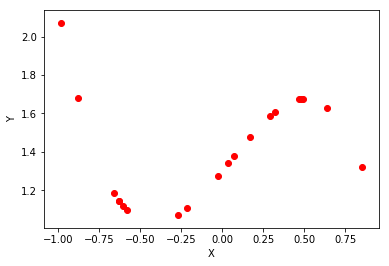

In [4]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

def plot_data(X, Y):
    plt.figure() # create a figure
    plt.scatter(X, Y, c='r') # plot the data in color=red
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def sample_polynomial_data(m=20, order=3, _range=1):
    coeffs = np.random.randn(order + 1) # initialise random coefficients for each order of the input + a constant offset
    print(Polynomial(coeffs))
    poly_func = np.vectorize(Polynomial(coeffs)) # 
    X = np.random.randn(m)
    X = np.random.uniform(low=-_range, high=_range, size=(m,))
    Y = poly_func(X)
    return X, Y, coeffs #returns X (the input), Y (labels) and coefficients for each power

m = 20 # how many examples do we want?
order = 3 # how many powers do we want to raise our input data to?
X, Y, ground_truth_coeffs = sample_polynomial_data(m, order)
print('X:',X, '\n')
print('Y:',Y, '\n')
print('Ground truth coefficients:', ground_truth_coeffs, '\n')
plot_data(X, Y)

class MultiVariableLinearHypothesis:
    def __init__(self, n_features, regularization_factor): #add regularization factor as parameter
        self.n_features = n_features
        self.regularization_factor = regularization_factor
        self.b = np.random.randn()
        self.w = np.random.randn(n_features)
        
    def __call__(self, X): # what happens when we call our model, input is of shape (n_examples, n_features)
        y_hat = np.matmul(X, self.w) + self.b # make prediction, now using vector of weights rather than a single value
        return y_hat # output is of shape (n_examples, 1)
    
    def update_params(self, new_w, new_b):
        self.w = new_w
        self.b = new_b
        
    def calc_deriv(self, X, y_hat, labels):
        diffs = y_hat-labels
        dLdw = 2 * np.array([np.sum(diffs * X[:, i]) / m for i in range(self.n_features)]) + self.regularization_factor*self.w # add regularization gradient
        dLdb = 2 * np.sum(diffs) / m
        return dLdw, dLdb

def create_polynomial_inputs(X, order=3):
    new_dataset = np.array([np.power(X, i) for i in range(1, order + 1)]).T
    return new_dataset # new_dataset should be shape [m, order]

def train(num_epochs, X, Y, H):
    for e in range(num_epochs): # for this many complete runs through the dataset
        y_hat = H(X) # make predictions
        dLdw, dLdb = H.calc_deriv(X, y_hat, Y) # calculate gradient of current loss with respect to model parameters
        new_w = H.w - learning_rate * dLdw # compute new model weight using gradient descent update rule
        new_b = H.b - learning_rate * dLdb # compute new model bias using gradient descent update rule
#       norm = np.linalg.norm([[new_w - H.w], [new_b - H.w]], 2)
        H.update_params(new_w, new_b) # update model weight and bias
#     print(f'THE MODEL DIDNT CONVERGE IN {num_epochs} EPOCHS')
def plot_h_vs_y(X, y_hat, Y):
    plt.figure()
    plt.scatter(X, Y, c='r', label='Label')
    plt.scatter(X, y_hat, c='b', label='Prediction', marker='x')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

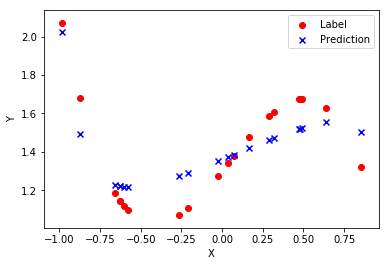

[ 0.34398409  0.04686265 -0.09603325  0.0347748  -0.17411679  0.05022729
 -0.15273151  0.0446114  -0.13116702  0.05343476 -0.1249526   0.05456386
 -0.08522885  0.0447835  -0.07481925]


In [14]:
num_epochs = 500
learning_rate = 0.1
regularization_factor = 0.1
highest_order_power = 15

polynomial_augmented_inputs = create_polynomial_inputs(X, highest_order_power) # need normalization to put higher coefficient variables on the same order of magnitude as the others
H = MultiVariableLinearHypothesis(n_features=highest_order_power, regularization_factor=regularization_factor)

train(num_epochs, polynomial_augmented_inputs, Y, H)
plot_h_vs_y(X, H(polynomial_augmented_inputs), Y)
print(H.w)

## Next steps
- [Intro to PyTorch](https://github.com/AI-Core/Strong-ML-Foundations/blob/master/Regularization.ipynb)